# Exemples avec le thesaurus Wordnet
Wordnet est une base de données qui fournit plusieurs informations lexicales (nom, verbe, adverbe, adjectif), dont les suivantes:

* Les différentes définitions d'un mot
* Les synonymes d'un mot
* Les concepts généraux reliés à un mot
* Les concepts spécifiques reliés à un mot
* Les différentes relations entre 2 mots
* Wordnet est disponible en ligne sur la page suivante: http://wordnetweb.princeton.edu/perl/webwn?s=search

On peut également accéder à ces informations par l'entremise de NLTK. Les sections suivantes illustrent comment faire.

## 1. Les synonymes - Synsets
La notion de synonyme est représentée dans Wordnet par des synsets (synonym sets). Les synsets sont des ensembles de mots qui sont fortement reliés entre eux, des quasi-synonymes.

In [1]:
from nltk.corpus import wordnet as wn

word1 = 'computer'
synsets = wn.synsets(word1)
print(synsets)

[Synset('computer.n.01'), Synset('calculator.n.01')]


Le nom d'un synset donne les informations suivantes: le mot, son POS et le numéro de définition. Par exemple, 'car.n.03' correspond à la 3e définition du nom car.

Il est possible d'obtenir les quasi-synonymes pour chacun des synsets avec la fonction lemma_names().

In [2]:
for synset in synsets:
    print("Synset {} = {}".format(synset._name, synset.lemma_names()))

Synset computer.n.01 = ['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system']
Synset calculator.n.01 = ['calculator', 'reckoner', 'figurer', 'estimator', 'computer']


On peut également obtenir les synonymes directement à partir du nom du synset.



In [3]:
wn.synset('calculator.n.01').lemma_names()


['calculator', 'reckoner', 'figurer', 'estimator', 'computer']

Les synsets sont disponibles pour toutes les classes ouvertes de mots. Voici un exemple avec le mot back qui peut prendre différentes étiquettes grammaticales et qui est fortement polysémique.

In [4]:
import pandas as pd

verb1 = "back"
synonyms = list()
for synset in wn.synsets(verb1):
    synonyms.append([synset._name, synset._pos, synset.lemma_names()])
    
display(pd.DataFrame(synonyms, columns=["Synset", "POS", "Synonymes"]))

,Synset,POS,Synonymes
0,back.n.01,n,"[back, dorsum]"
1,rear.n.05,n,"[rear, back]"
2,back.n.03,n,"[back, rear]"
3,back.n.04,n,[back]
4,spinal_column.n.01,n,"[spinal_column, vertebral_column, spine, backb..."
5,binding.n.05,n,"[binding, book_binding, cover, back]"
6,back.n.07,n,[back]
7,back.n.08,n,"[back, backrest]"
8,back.n.09,n,[back]
9,back.v.01,v,"[back, endorse, indorse, plump_for, plunk_for,..."


## 2. Les définitions des mots...
À vrai dire, les définitions sont associées aux synsets, pas aux mots. Donc un synset est un groupe de mots qui véhicule un sens similaire. En voici un exemple pour le mot "bass".

In [5]:
import pandas as pd

word2 = 'bass'

definitions = list()
for synset in wn.synsets(word2):
    definitions.append([synset._name, synset._pos, synset.definition(), synset.lemma_names()])

display(pd.DataFrame(definitions, columns=["Synset", "POS", "Définition", "Synonymes"]))

,Synset,POS,Définition,Synonymes
0,bass.n.01,n,the lowest part of the musical range,[bass]
1,bass.n.02,n,the lowest part in polyphonic music,"[bass, bass_part]"
2,bass.n.03,n,an adult male singer with the lowest voice,"[bass, basso]"
3,sea_bass.n.01,n,the lean flesh of a saltwater fish of the fami...,"[sea_bass, bass]"
4,freshwater_bass.n.01,n,any of various North American freshwater fish ...,"[freshwater_bass, bass]"
5,bass.n.06,n,the lowest adult male singing voice,"[bass, bass_voice, basso]"
6,bass.n.07,n,the member with the lowest range of a family o...,[bass]
7,bass.n.08,n,nontechnical name for any of numerous edible m...,[bass]
8,bass.s.01,s,having or denoting a low vocal or instrumental...,"[bass, deep]"


## 3. Taxonomie - une arborescence de concepts
Un aperçu des hyponymes et hyperonymes d'un mot (ou plutôt d'un synset).

In [6]:
def get_hyponyms(word):
    first_synset = wn.synsets(word)[0]
    return first_synset.hyponyms()

get_hyponyms('computer') # computer, bank, cat, duck, tree

[Synset('analog_computer.n.01'),
 Synset('digital_computer.n.01'),
 Synset('home_computer.n.01'),
 Synset('node.n.08'),
 Synset('number_cruncher.n.02'),
 Synset('pari-mutuel_machine.n.01'),
 Synset('predictor.n.03'),
 Synset('server.n.03'),
 Synset('turing_machine.n.01'),
 Synset('web_site.n.01')]

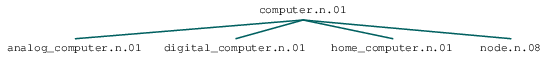

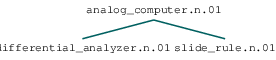

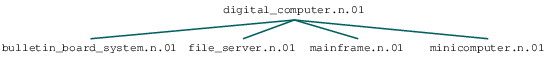

In [7]:
import nltk

def build_partial_tree(synset):
    children_hyponyms = []
    for hyponym in synset.hyponyms()[0:4]:
        children_hyponyms.append(nltk.Tree(hyponym.name(), children=[]))
    return nltk.Tree(synset.name(), children=children_hyponyms)

first_synset = wn.synsets('computer')[0]  # computer, bank, cat, duck, tree
display(build_partial_tree(first_synset))
for hyponym in first_synset.hyponyms()[0:2]:
    display(build_partial_tree(hyponym))

In [8]:
def get_hypernyms(word):
    results = list()
    for synset in wn.synsets(word): 
        hypernym = synset.hypernyms()
        results.append([synset, hypernym])
    return results

results = get_hypernyms('computer')  # computer, bank, cat, duck, tree
display(pd.DataFrame(results, columns=["Hyponyme", "Hyperonyme"]))

,Hyponyme,Hyperonyme
0,Synset('computer.n.01'),[Synset('machine.n.01')]
1,Synset('calculator.n.01'),[Synset('expert.n.01')]


## 4. Wordnet offre plusieurs autres relations
Voir les notes du cours à propos des différentes relations de Wordnet.

In [9]:
from collections import defaultdict

def get_related_words(word):
    related = defaultdict(list)
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            related["Synonymes"].append(lemma.name())
            for antonym in lemma.antonyms():
                related["Antonymes"].append(antonym.name())    
            for form in lemma.derivationally_related_forms():
                related["Formes dérivées"].append(form.name())
        for meronym in synset.part_meronyms():
            for lemma in meronym.lemmas():
                related["Méronymes"].append(lemma.name())
        for holonym in synset.member_holonyms():
            for lemma in holonym.lemmas():
                related["Holonymes"].append(lemma.name())
        for entailment in synset.entailments():
            for lemma in entailment.lemmas():
                related["Implication"].append(lemma.name())
    return [[relation, set(lemmas)] for relation, lemmas in related.items()]

In [10]:
word3 = 'tree'  # fruit, intelligent, stupid, fast, train, tree, walk, eat, tease, snore
related = get_related_words(word3)

related_words = pd.DataFrame(related)
pd.set_option('display.max_colwidth', None)
display(pd.DataFrame(related_words))

,0,1
0,Synonymes,"{Sir_Herbert_Beerbohm_Tree, Tree, shoetree, tree_diagram, tree, corner}"
1,Formes dérivées,"{tree, treelet, corner}"
2,Méronymes,"{limb, burl, tree_branch, trunk, stump, tree_stump, bole, tree_trunk, crown, treetop}"
3,Holonymes,"{wood, forest, woods}"


## 5. Similarité entre 2 mots en fonction de leur distance dans la taxonomie
Le calcul de similarité entre 2 mots consiste à :

* trouver leur plus proche parent commun (lowest common hypernym aussi appelé lowest common ancestor) dans la taxonomie de Wordnet et
* convertir la distance entre les mots en valeur de similarité.

Commençons par la première étape qui consiste à détermine l'ancêtre commun de 2 mots. À vrai dire, on cherche l'ancêtre de synsets associés aux 2 mots. Pour illustrer, nous allons comparer le mot cat à plusieurs autres mots.

In [11]:
first_word = "cat"
other_words = ["cat", "feline", "dog", "elephant", "kangaroo", "car"]

first_synset = wn.synsets(first_word)[0]
results = list()
for other_word in other_words:
    other_synset = wn.synsets(other_word)[0] # on prend ici par défaut le premier synset
    ancestor = first_synset.lowest_common_hypernyms(other_synset)
    results.append([first_synset, other_synset, ancestor])

display(pd.DataFrame(results, columns=["Synset1", "Synset2", "Plus proche parent"]))   

,Synset1,Synset2,Plus proche parent
0,Synset('cat.n.01'),Synset('cat.n.01'),[Synset('cat.n.01')]
1,Synset('cat.n.01'),Synset('feline.n.01'),[Synset('feline.n.01')]
2,Synset('cat.n.01'),Synset('dog.n.01'),[Synset('carnivore.n.01')]
3,Synset('cat.n.01'),Synset('elephant.n.01'),[Synset('placental.n.01')]
4,Synset('cat.n.01'),Synset('kangaroo.n.01'),[Synset('mammal.n.01')]
5,Synset('cat.n.01'),Synset('car.n.01'),[Synset('whole.n.02')]


La similarité entre 2 mots est calculée à partir de la distance entre 2 synsets associés aux mots.



In [12]:
first_synset = wn.synsets(first_word)[0]
results = list()
for other_word in other_words:
    other_synset = wn.synsets(other_word)[0] # on prend ici par défaut le premier synset
    similarity = first_synset.path_similarity(other_synset)
    results.append([first_synset, other_synset, similarity])

display(pd.DataFrame(results, columns=["Synset1", "Synset2", "Similarité"]))   

,Synset1,Synset2,Similarité
0,Synset('cat.n.01'),Synset('cat.n.01'),1.000000
1,Synset('cat.n.01'),Synset('feline.n.01'),0.500000
2,Synset('cat.n.01'),Synset('dog.n.01'),0.200000
3,Synset('cat.n.01'),Synset('elephant.n.01'),0.166667
4,Synset('cat.n.01'),Synset('kangaroo.n.01'),0.125000
5,Synset('cat.n.01'),Synset('car.n.01'),0.055556


Cependant les mots peuvent appartenir à plusieurs synsets. Il est donc préférable de comparer la similarité de toutes les paires de synsets et de retenir la paire qui donne la valeur maximale.



In [13]:
results = list()
for other_word in other_words:
    best_synset1 = None
    best_synset2 = None
    best_sim = 0.0
    for first_synset in wn.synsets(first_word):
        for other_synset in wn.synsets(other_word):
            similarity = first_synset.path_similarity(other_synset)
            if similarity and (similarity > best_sim):
                best_sim = similarity
                best_synset1 = first_synset
                best_synset2 = other_synset
    lcs = best_synset1.lowest_common_hypernyms(best_synset2)
    results.append([best_synset1, best_synset2, lcs, best_sim])

display(pd.DataFrame(results, columns=["Synset1", "Synset2", "Plus proche parent", "Similarité"]))   

,Synset1,Synset2,Plus proche parent,Similarité
0,Synset('cat.n.01'),Synset('cat.n.01'),[Synset('cat.n.01')],1.000000
1,Synset('cat.n.01'),Synset('feline.n.01'),[Synset('feline.n.01')],0.500000
2,Synset('cat.n.01'),Synset('dog.n.01'),[Synset('carnivore.n.01')],0.200000
3,Synset('cat.n.01'),Synset('elephant.n.01'),[Synset('placental.n.01')],0.166667
4,Synset('cat.n.01'),Synset('kangaroo.n.01'),[Synset('mammal.n.01')],0.125000
5,Synset('caterpillar.n.02'),Synset('car.n.01'),[Synset('self-propelled_vehicle.n.01')],0.200000
